In [15]:
import Useful_functions as uf
import os
import glob
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Load and Pre-process data

In [2]:
# Now open a directory/folder "/zDemo_data"
fd = os.open("Participants_data", os.O_RDONLY)

# Use os.fchdir() method to change the dir/folder
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents/Decoy/22AY_01_Code/Participants_data


In [3]:
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Create DataFrame storing the demographic info 
col_names = ['Age', 'Sex', 'Race', 'Ethnicity', 'Date', 'PID', 'SurveyID', 'Email', 'CouplingCondition', 'PhantomCondition']
demographic_info_df = pd.DataFrame(columns=col_names)

for file in csv_files: 
    df = pd.read_csv(file)
    # Check if first row contains demographic info
                      
    if((df["Gender"][0] == "Male") or (df["Gender"][0] == "Female") or (df["Gender"][0] == "Other")): 
        Age = df["Age"][0]
        Sex = df["Gender"][0]
        Race = df["Race"][0]
        Ethnicity = df["Ethnicity"][0]
        Date = df["Date"][0]
        PID = df["User_PID"][0]
        SurveyID = df["Survey_ID"][0]
        Email = df["User_email"][0]
        CouplingCondition = df["Coupling"][0]
        PhantomCondition = df["Phantom_condition"][0]
        
        demo_col = pd.DataFrame(data={'Age': Age, 'Sex': Sex, 'Race': Race, 'Ethnicity': Ethnicity, 'Date': Date, 'PID': PID, 'SurveyID': SurveyID, 'Email': Email, 'CouplingCondition': CouplingCondition,  'PhantomCondition': PhantomCondition}, index=range(1))
        demographic_info_df = demographic_info_df.append(demo_col, ignore_index = True)
    else: 
        print("Error: " + str(file))

demographic_info_df.head(20)

,Age,Sex,Race,Ethnicity,Date,PID,SurveyID,Email,CouplingCondition,PhantomCondition
0,18,Female,Not_hispanic,White,04/11/2022,16938385,40781,ehefner@ucsd.edu,High coupling,Highly_desirable
1,21,Female,Not_hispanic,East_Asian,04/08/2022,17212732,40447,kyc002@ucsd.edu,Low coupling,Highly_desirable
2,19,Male,Hispanic,Hispanic,05/19/2022,16292970,41454,jpcruz@ucsd.edu,Low coupling,Undesirable
3,19,Female,Not_hispanic,East_Asian,05/20/2022,16430620,37956,kdelapen@ucsd.edu,Low coupling,Weakly_desirable
4,23,Female,Not_hispanic,White,04/07/2022,16083027,34796,mengel@ucsd.edu,Low coupling,Weakly_desirable
5,23,Male,Not_hispanic,White,05/22/2022,15402507,44066,jtschnec@ucsd.edu,High coupling,Weakly_desirable
6,22,Female,Not_hispanic,East_Asian,04/11/2022,15501740,33898,lnn019@ucsd.edu,High coupling,Weakly_desirable
7,22,Male,Not_hispanic,East_Asian,04/11/2022,16587075,37993,bgfang@ucsd.edu,High coupling,Undesirable
8,21,Female,Not_hispanic,White,05/23/2022,16155105,33491,kjevans@ucsd.edu,Low coupling,Undesirable
9,19,Female,Not_hispanic,East_Asian,05/20/2022,16297216,38313,lballest@ucsd.edu,High coupling,Undesirable


In [4]:
# Pre-process data to get choices info.

all_responses = pd.DataFrame(columns=['Decoy', 'Item', 'Option_1', 'Option_2', 'Option_3', 'Choice', 'CatchTrials', 'Deliberation_RT', 'Choice_RT', 'Too_Slow'])

for file in csv_files: 
    df = pd.read_csv(file)
    Survey_ID = df["Survey_ID"][0]
    phantom_condition = df["Phantom_condition"][0]
    coupling_condition = df["Coupling"][0]
    
    #Check shape of file
    n, m = df.shape
    for x in range(n):
        # Select rows corresponding to choices.
        if((df["User_email"][x]!="C") and (df["User_email"][x]!="F") and (df["User_email"][x]!="A") and (df["User_email"][x]!="S") and (df["User_email"][x]!="P")): #pd.isna(df["Item"][x])
            df.drop([x])
        else: 
            decoy = df["User_email"][x]
            item = df["Gender"][x]
            Option_1 = df["Age"][x]
            Option_2 = df["Phantom_condition"][x]
            Option_3 = df["Race"][x]
            Choice = df["User_PID"][x]
            CatchTrials = df["Date"][x]
            Deliberation_RT = df["Survey_ID"][x]
            Choice_RT = df["Ethnicity"][x]
            Too_Slow = df["Coupling"][x]
            
            demo_col = pd.DataFrame(data={'Decoy': decoy, 'Item': item, 'Option_1': Option_1, 'Option_2': Option_2, 'Option_3': Option_3, 'Choice': Choice, 'CatchTrials': CatchTrials, 'Deliberation_RT': Deliberation_RT, 'Choice_RT': Choice_RT, 'Too_Slow': Too_Slow, 'Survey_ID': Survey_ID, 'CouplingCondition': coupling_condition, 'PhantomCondition': phantom_condition}, index=range(1))
            all_responses = all_responses.append(demo_col, ignore_index = True)

print(all_responses.shape)
all_responses.head(10)


(27300, 13)


,Decoy,Item,Option_1,Option_2,Option_3,Choice,CatchTrials,Deliberation_RT,Choice_RT,Too_Slow,Survey_ID,CouplingCondition,PhantomCondition
0,F,Kitchen Scale,A,C,B,C,NaN,10000,620,0,40781,High coupling,Highly_desirable
1,C,Baby crib,C_A,B,A,A,NaN,10000,389.0,0,40781,High coupling,Highly_desirable
2,S,Baby high chair,A,B,S_B,B,NaN,10000,761,0,40781,High coupling,Highly_desirable
3,A,Leaf Blower,A,B,A_B,A,NaN,10000,308,0,40781,High coupling,Highly_desirable
4,P,Wifi extender,A,B,P_B,A,NaN,10000,586.0,0,40781,High coupling,Highly_desirable
5,P,Electric mop,A,P_B,B,B,NaN,10000,451,0,40781,High coupling,Highly_desirable
6,C,Smart lock,C_B,A,B,B,NaN,10000,285.0,0,40781,High coupling,Highly_desirable
7,S,Air Fryer Oven,B,S_A,A,A,NaN,10000,301,0,40781,High coupling,Highly_desirable
8,F,Stun gun,B,A,C,B,NaN,10000,297,0,40781,High coupling,Highly_desirable
9,A,Smart bulb,A,B,A_A,A,NaN,10000,371,0,40781,High coupling,Highly_desirable


In [5]:
# Save all responses dataframe to a csv file.

all_responses.to_csv('/Users/luisalvarez/Documents/Decoy/22AY_01_Code/all_responses.csv')

In [6]:
# Get rough info on total number of participants.

Participants_PIDs = all_responses["Survey_ID"].unique()
total_n = int(len(Participants_PIDs))

print("Total number of particiants: " + str(total_n))

number_of_low_coupling = demographic_info_df["CouplingCondition"].str.count("Low coupling").sum()
print("Total number of participants 'low coupling':" + str(number_of_low_coupling))  

number_of_high_coupling = demographic_info_df["CouplingCondition"].str.count("High coupling").sum()
print("Total number of participants 'high coupling':" + str(number_of_high_coupling))  

Total number of particiants: 273
Total number of participants 'low coupling':132
Total number of participants 'high coupling':141


## Participants RT

In [7]:
# Pre process RT data, turn 'str' to NaN, then remove NaN.

all_responses["Choice_RT"] = pd.to_numeric(all_responses["Choice_RT"], errors='coerce')
RT_df = all_responses["Choice_RT"].dropna()
RT_df = RT_df/1000

In [8]:
# Checking mean response time

rt_mean = RT_df.mean()
rt_mean = rt_mean#/1000

print("Group mean response time: " + str(round(rt_mean, 2)) + " sec.")

Group mean response time: 1.53 sec.


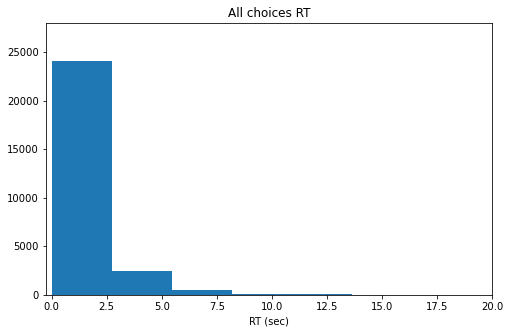

In [9]:
# Checking mean response time per participant 

group_rt_df = pd.DataFrame(columns=['PID', 'Mean_RT (sec)'])

for x in Participants_PIDs:
    participant_pid = str(x)
    participant_rt = all_responses[all_responses["Survey_ID"] == x]["Choice_RT"].apply(float).mean()/1000
    participant_rt = round(participant_rt, 2)
    current_p_df = pd.DataFrame(data={'PID': participant_pid, 'Mean_RT (sec)': participant_rt}, index=range(1))
    group_rt_df = group_rt_df.append(current_p_df, ignore_index = True)

plt.subplots(figsize=(8, 5))
plt.hist(RT_df, bins=700)
plt.title('All choices RT')
plt.xlabel('RT (sec)')
plt.xlim(-.25, 20)
plt.ylim(0, 28000)

plt.show()


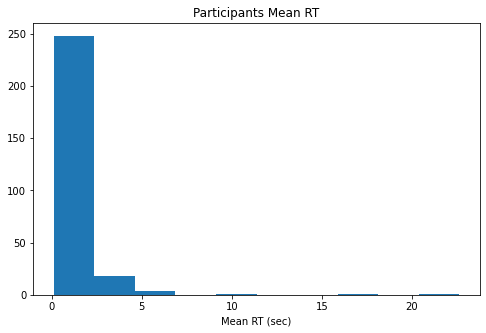

In [10]:
plt.subplots(figsize=(8, 5))
plt.hist(group_rt_df["Mean_RT (sec)"], bins=10)
plt.title('Participants Mean RT')
plt.xlabel('Mean RT (sec)')
plt.show()


## Catch Trials 

In [12]:
# Checking filler/catch trials work as expected.

filler_total = all_responses[all_responses["Decoy"] =="F"]["Choice"].count()
filler_catch = all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("C").sum()
filler_miss = all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("B").sum() + all_responses[all_responses["Decoy"] =="F"]["Choice"].str.count("A").sum()

print("Total number of catch trials: " + str(filler_total))
print("Total 'catch trials' correct: " + str(filler_catch))
print("Total 'catch trials' incorrect': " + str(filler_miss))

print("\n Correct trials avg: " + str(round(filler_catch/filler_total, 2)*100) + "%")
print("\n Incorrect trials avg: " + str(round(filler_miss/filler_total, 2)*100) + "%")


Total number of catch trials: 5460
Total 'catch trials' correct: 3837
Total 'catch trials' incorrect': 1623

 Correct trials avg: 70.0%

 Incorrect trials avg: 30.0%


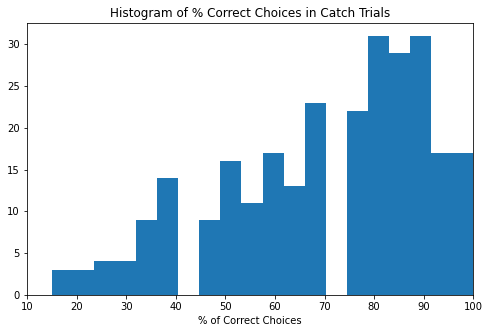

In [13]:
# Each participants catch trials info

group_catch_df = pd.DataFrame(columns=['PID', 'Correct(num)', 'Incorrect(num)', 'Correct(%)', 'Incorrect(%)'])

for x in Participants_PIDs:
    participant_pid = str(x)
    current_part_catch_df = all_responses[all_responses["Survey_ID"] == x]
    current_part_catch_df = current_part_catch_df[current_part_catch_df["Decoy"] =="F"]
    current_part_total_trials = current_part_catch_df["Choice"].count()
    current_part_catch_freq = current_part_catch_df["Choice"].str.count("C").sum()
    current_part_miss_freq = current_part_catch_df["Choice"].str.count("B").sum() + current_part_catch_df["Choice"].str.count("A").sum()
    current_part_catch_perc = current_part_catch_freq/current_part_total_trials
    current_part_miss_perc = current_part_miss_freq/current_part_total_trials
    
    current_p_df = pd.DataFrame(data={'PID': participant_pid, 'Correct(num)': current_part_catch_freq, "Incorrect(num)": current_part_miss_freq, "Correct(%)": current_part_catch_perc*100, "Incorrect(%)": current_part_miss_perc*100}, index=range(1))
    group_catch_df = group_catch_df.append(current_p_df, ignore_index = True)
    
plt.subplots(figsize=(8, 5))
plt.hist(group_catch_df["Correct(%)"], bins=20)
plt.title('Histogram of % Correct Choices in Catch Trials')
plt.xlabel('% of Correct Choices')
plt.xlim(10, 100)
plt.show()

In [16]:
catch_items_df = all_responses[all_responses["Decoy"] == "F"]
catch_summary_df = pd.DataFrame(columns=['Item', 'Correct(num)', 'Incorrect(num)', 'Correct(%)', 'Incorrect(%)', "Times_Encountered"])

catch_items_list = catch_items_df["Item"].unique()

for item in catch_items_list: 
    
    current_item_catch_df = catch_items_df[catch_items_df["Item"] == item]
    times_encountered = current_item_catch_df["Choice"].count()
    current_item_catch_freq = current_item_catch_df["Choice"].str.count("C").sum()
    current_item_miss_freq = current_item_catch_df["Choice"].str.count("B").sum() + current_item_catch_df["Choice"].str.count("A").sum()
    current_item_catch_perc = current_item_catch_freq/times_encountered
    current_item_miss_perc = current_item_miss_freq/times_encountered
    
    current_item_catch_perc = np.round(current_item_catch_perc, 2)
    current_item_miss_perc = np.round(current_item_miss_perc, 2)
    
    current_i_df = pd.DataFrame(data={'Item': item, 'Correct(num)': current_item_catch_freq, "Incorrect(num)": current_item_miss_freq, "Correct(%)": current_item_catch_perc*100, "Incorrect(%)": current_item_miss_perc*100, "Times_Encountered":times_encountered}, index=range(1))
    catch_summary_df = catch_summary_df.append(current_i_df, ignore_index = True)

catch_summary_df.head(20)

,Item,Correct(num),Incorrect(num),Correct(%),Incorrect(%),Times_Encountered
0,Kitchen Scale,165,94,64.0,36.0,259
1,Stun gun,170,107,61.0,39.0,277
2,Hearing aid,187,88,68.0,32.0,275
3,Alarm clock,184,84,69.0,31.0,268
4,Megaphone,198,63,76.0,24.0,261
5,Thermometer gun,211,60,78.0,22.0,271
6,Outdoor TV antenna,201,72,74.0,26.0,273
7,Wagon cart,180,85,68.0,32.0,265
8,Baby rocker,205,56,79.0,21.0,261
9,Inflatable baby pool,207,74,74.0,26.0,281


## Filter/remove participants with Correct(%) < 80


In [17]:
participants_to_filter_out = group_catch_df[group_catch_df["Correct(%)"] < 80]["PID"].unique()

print("Participants to filter out (" +str(len(participants_to_filter_out)) + "): " + str(participants_to_filter_out))

Participants to filter out (148): ['37956' '38313' '36203' '36951' '40448' '34943' '40548' '38543' '40016'
 '40719' '38642' '43019' '32388' '30471' '40469' '35225' '40763' '36413'
 '39312' '40815' '43075' '38533' '39540' '36123' '32575' '40703' '34549'
 '34863' '37845' '38236' '38045' '42119' '41970' '43993' '42195' '42626'
 '33032' '37813' '38611' '35606' '41387' '32830' '31348' '32366' '31893'
 '32342' '34504' '40762' '42977' '41785' '44083' '37004' '32059' '33918'
 '30973' '36926' '40706' '42530' '35436' '40082' '42993' '42606' '34705'
 '44139' '37455' '35636' '43929' '27316' '38896' '41811' '36605' '33717'
 '31478' '40584' '39603' '39503' '31393' '42563' '33214' '32218' '28973'
 '39449' '38627' '43126' '38919' '27691' '42674' '32912' '41850' '35788'
 '41077' '38324' '40440' '41048' '42906' '38022' '41706' '40220' '40571'
 '38671' '36723' '26982' '36592' '33012' '34547' '35617' '37299' '39366'
 '39031' '44188' '35920' '40996' '31077' '28283' '41650' '43646' '41910'
 '41036' '40588' 

In [19]:
all_responses_filtered = all_responses[all_responses.Survey_ID.isin(participants_to_filter_out) == False]

all_responses_filtered.to_csv('/Users/luisalvarez/Documents/Decoy/22AY_01_Code/all_responses_filtered.csv', index=False)

print(all_responses_filtered.shape)


(12500, 13)


In [23]:
Participants_PIDs = all_responses_filtered["Survey_ID"].unique()
total_n = int(len(Participants_PIDs))

print("Total number of particiants (" + str(len(Participants_PIDs)) + "): ")
print(Participants_PIDs)

Total number of particiants (125): 
['40781' '40447' '41454' '34796' '44066' '33898' '37993' '33491' '39630'
 '39618' '34741' '39056' '33553' '41241' '41067' '38284' '36391' '44198'
 '30026' '40413' '38810' '37978' '36300' '36432' '43026' '36013' '28943'
 '40446' '41031' '29949' '42405' '39092' '40309' '41900' '37059' '37166'
 '35108' '42961' '32172' '39232' '42504' '35725' '35868' '34072' '40441'
 '33506' '41860' '40637' '39841' '43188' '35956' '37555' '43223' '35851'
 '41319' '37251' '35271' '39494' '38529' '27372' '43507' '36122' '34906'
 '42344' '37478' '43641' '39600' '41830' '44180' '44082' '36585' '36195'
 '41663' '42365' '36354' '44172' '40514' '33494' '36878' '40539' '37202'
 '36812' '42146' '41969' '40551' '34275' '33428' '40314' '42234' '43687'
 '35998' '41482' '43544' '37550' '43101' '41171' '30586' '35848' '35117'
 '36984' '30067' '43445' '32743' '42552' '35602' '40116' '36020' '33718'
 '37439' '41469' '39463' '41840' '38312' '31833' '32946' '39492' '43052'
 '32782' '31280

In [30]:
# Get the number of participants for each coupling condition.

decoy_P_df = all_responses_filtered[all_responses_filtered["Decoy"] == "P"]
decoy_C_HC_df = decoy_P_df[decoy_P_df["CouplingCondition"] == "High coupling"].reset_index()
decoy_C_LC_df = decoy_P_df[decoy_P_df["CouplingCondition"] == "Low coupling"].reset_index()
C_HighCoupling_total = decoy_C_HC_df["Survey_ID"].unique()
C_LowCoupling_total = decoy_C_LC_df["Survey_ID"].unique()

number_of_HC = int(len(C_HighCoupling_total))
number_of_LC = int(len(C_LowCoupling_total))

print("Total number of participants in 'High Coupling': " + str(number_of_HC))
print("Total number of participants in 'Low Coupling': " + str(number_of_LC))

Total number of participants in 'High Coupling': 64
Total number of participants in 'Low Coupling': 61


In [24]:
# Get the number of participants for each phantom condition.


decoy_P_HD_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Highly_desirable"].reset_index()
decoy_P_WD_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Weakly_desirable"].reset_index()
decoy_P_U_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Undesirable"].reset_index()
Phantom_HD_part_total = decoy_P_HD_df["Survey_ID"].unique()
Phantom_WD_part_total = decoy_P_WD_df["Survey_ID"].unique()
Phantom_U_part_total = decoy_P_U_df["Survey_ID"].unique()

number_of_HD = int(len(Phantom_HD_part_total))
number_of_WD = int(len(Phantom_WD_part_total))
number_of_U = int(len(Phantom_U_part_total))

print("Total number of participants in 'Highly Desirable': " + str(int(len(Phantom_HD_part_total))))
print("Total number of participants in 'Weakly Desirable': " + str(int(len(Phantom_WD_part_total))))
print("Total number of participants in 'Undesirable': " + str(int(len(Phantom_U_part_total))))

Total number of participants in 'Highly Desirable': 40
Total number of participants in 'Weakly Desirable': 46
Total number of participants in 'Undesirable': 39
